## Linear Regression Example
A linear regression learning algorithm example using TensorFlow library.

+ Author: xiaoran
+ Time: 2019-02-14 PM
+ Copy: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 设置超参数
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# 训练数据
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [7]:
# 设置图中输入数据的占位符
X = tf.placeholder("float")
Y = tf.placeholder("float")

# 随机初始化变量W 和 b
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bais")

# 构造线性回归模型 y = w * x + b
pred_y = tf.add(tf.multiply(W, X), b)

# 计算损失函数和优化方式
# 使用最小平方误差
loss = tf.reduce_sum(tf.pow(pred_y - Y, 2)) / (2 * n_samples)

# 使用随机梯度下降进行优化
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


In [8]:
# 初始化随机变量
init = tf.global_variables_initializer()

Eopch: 0050 loss= 0.08148976 W= 0.28728527 b= 0.5303151
Eopch: 0100 loss= 0.08096736 W= 0.28504357 b= 0.54644203
Eopch: 0150 loss= 0.08050547 W= 0.28293508 b= 0.56160975
Eopch: 0200 loss= 0.08009703 W= 0.28095207 b= 0.57587546
Eopch: 0250 loss= 0.07973587 W= 0.2790869 b= 0.58929425
Eopch: 0300 loss= 0.07941653 W= 0.27733254 b= 0.601915
Eopch: 0350 loss= 0.07913423 W= 0.2756825 b= 0.6137843
Eopch: 0400 loss= 0.078884706 W= 0.2741311 b= 0.6249455
Eopch: 0450 loss= 0.07866411 W= 0.27267185 b= 0.6354432
Eopch: 0500 loss= 0.078469075 W= 0.27129942 b= 0.645316
Eopch: 0550 loss= 0.07829663 W= 0.27000853 b= 0.65460247
Eopch: 0600 loss= 0.078144245 W= 0.26879454 b= 0.66333646
Eopch: 0650 loss= 0.0780095 W= 0.26765248 b= 0.6715518
Eopch: 0700 loss= 0.07789045 W= 0.26657847 b= 0.67927825
Eopch: 0750 loss= 0.077785194 W= 0.26556846 b= 0.6865446
Eopch: 0800 loss= 0.07769217 W= 0.26461834 b= 0.6933796
Eopch: 0850 loss= 0.077609986 W= 0.26372474 b= 0.69980747
Eopch: 0900 loss= 0.07753732 W= 0.2628844

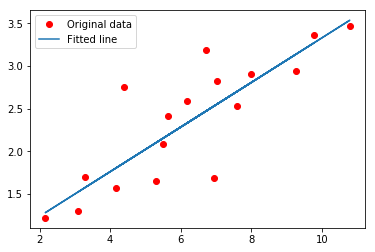

In [14]:
# satrt graph
with tf.Session() as sess:
    sess.run(init)
    
    # start training
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        # display log 
        if (epoch+1) % display_step == 0:
            print("Eopch:","%04d" % (epoch+1), "loss=", sess.run(loss, feed_dict={X: train_X, Y: train_Y}),"W=", sess.run(W), "b=", sess.run(b))
    print("Training Finish!")
    print("Training loss=", sess.run(loss, feed_dict={X: train_X, Y: train_Y}),"W=", sess.run(W), "b=", sess.run(b))
    print("Plot linear")
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()